In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
# read dataset
df = pd.read_csv("health_insurance.csv")

In [5]:
df

,age,gender,BMI,children,smoker_status,location,health_insurance_price
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.head()

,age,gender,BMI,children,smoker_status,location,health_insurance_price
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.tail()

,age,gender,BMI,children,smoker_status,location,health_insurance_price
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
df.shape

(1338, 7)

In [9]:
df.isnull().sum()

age                       0
gender                    0
BMI                       0
children                  0
smoker_status             0
location                  0
health_insurance_price    0
dtype: int64

In [10]:
df.isnull().sum() / df.shape[0]*100

age                       0.0
gender                    0.0
BMI                       0.0
children                  0.0
smoker_status             0.0
location                  0.0
health_insurance_price    0.0
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1338 non-null   int64  
 1   gender                  1338 non-null   object 
 2   BMI                     1338 non-null   float64
 3   children                1338 non-null   int64  
 4   smoker_status           1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe()

,age,BMI,children,health_insurance_price
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df['BMI'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

## Handling with missing value

In [14]:
newdf = df.fillna(df.mean())

In [15]:
newdf

,age,gender,BMI,children,smoker_status,location,health_insurance_price
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
newdf.isnull().sum()

age                       0
gender                    0
BMI                       0
children                  0
smoker_status             0
location                  0
health_insurance_price    0
dtype: int64

In [17]:
newdf.shape

(1338, 7)

<Axes: xlabel='age', ylabel='Density'>

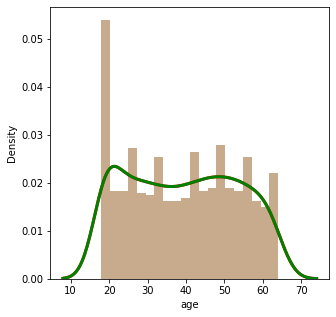

In [18]:
plt.figure(figsize=(5,5))
sns.distplot(df['age'],bins=20,kde_kws={'linewidth':3, 'color':'red'})
sns.distplot(newdf['age'],bins=20,kde_kws={'linewidth':3, 'color':'green'})

<Axes: xlabel='BMI', ylabel='Density'>

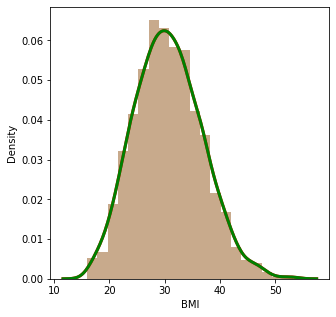

In [20]:
plt.figure(figsize=(5,5))
sns.distplot(df['BMI'],bins=20,kde_kws={'linewidth':3, 'color':'red'})
sns.distplot(newdf['BMI'],bins=20,kde_kws={'linewidth':3, 'color':'green'})

<Axes: xlabel='age'>

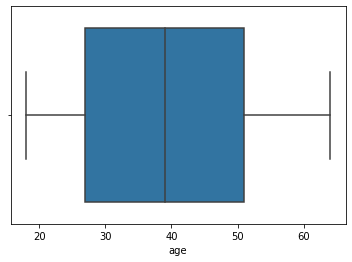

In [21]:
sns.boxplot(x='age',data=df)

<Axes: xlabel='age'>

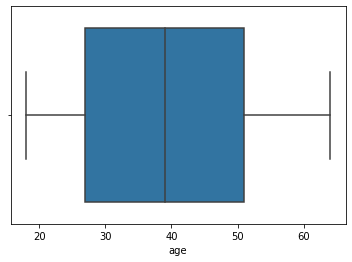

In [22]:
sns.boxplot(x='age',data=newdf)

<Axes: xlabel='BMI'>

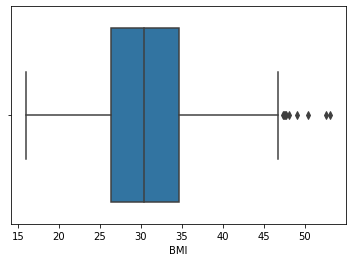

In [23]:
sns.boxplot(x='BMI',data=df)

<Axes: xlabel='BMI'>

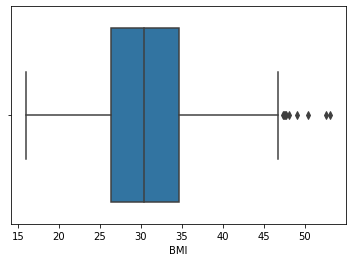

In [24]:
sns.boxplot(x='BMI',data=newdf)

## Removing outliers

In [26]:
Q1 = newdf.BMI.quantile(0.25)
Q3 = newdf.BMI.quantile(0.75)
IQR = Q3-Q1
print(f"IQR: {IQR}")
print(f"Quartile Q1: {Q1}")
print(f"Quartile Q3: {Q3}")

IQR: 8.3975
Quartile Q1: 26.29625
Quartile Q3: 34.69375


In [27]:
# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [28]:
# Identify and remove outliers
filtered_data = newdf[(newdf['BMI'] >= lower_bound) & (newdf['BMI'] <= upper_bound)]

<Axes: xlabel='BMI'>

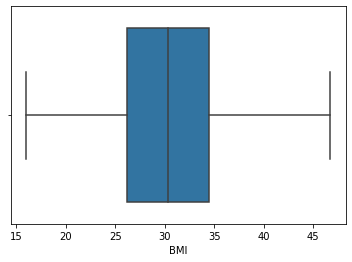

In [29]:
sns.boxplot(x='BMI',data=filtered_data)

## Exploratory data analysis(EDA)

<function matplotlib.pyplot.show(close=None, block=None)>

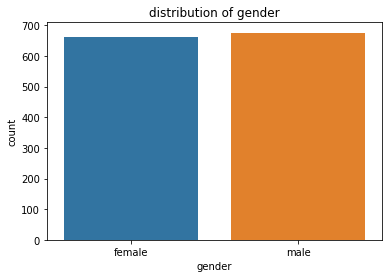

In [30]:
sns.countplot(x='gender',data=newdf)
plt.title("distribution of gender")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

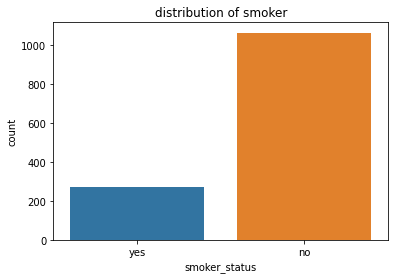

In [32]:
sns.countplot(x='smoker_status',data=newdf)
plt.title("distribution of smoker")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

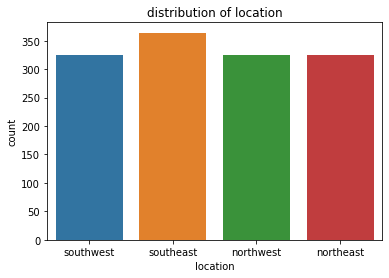

In [33]:
sns.countplot(x='location',data=newdf)
plt.title("distribution of location")
plt.show

<Axes: xlabel='age', ylabel='Density'>

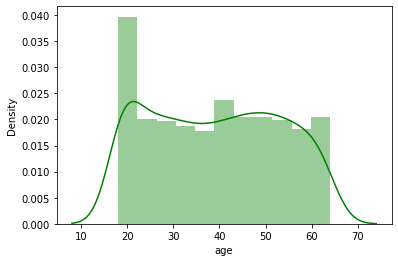

In [34]:
sns.distplot(newdf['age'],color='g',kde=True)

<Axes: xlabel='BMI', ylabel='Density'>

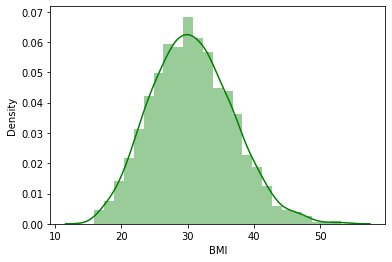

In [35]:
sns.distplot(newdf['BMI'],color='g',kde=True)

<Axes: xlabel='health_insurance_price', ylabel='Density'>

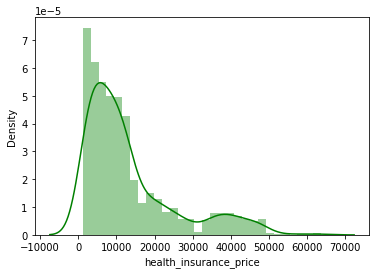

In [36]:
sns.distplot(newdf['health_insurance_price'],color='g',kde=True)

In [37]:
newdf.loc[newdf['health_insurance_price']==newdf['health_insurance_price'].max(), 'age']

543    54
Name: age, dtype: int64

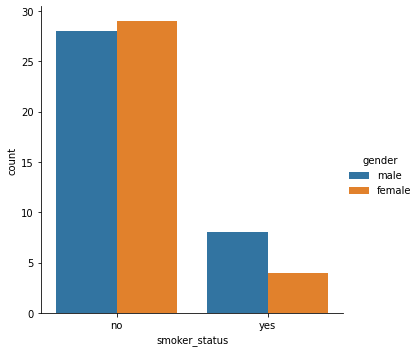

In [39]:
sns.catplot(x='smoker_status',kind='count',hue='gender',data=newdf[newdf.age==18])

<Axes: xlabel='gender', ylabel='health_insurance_price'>

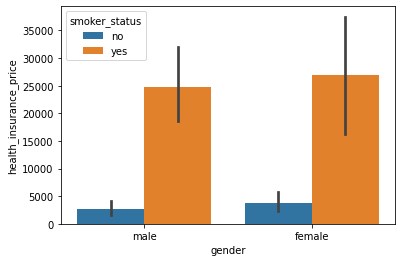

In [41]:
sns.barplot(x='gender',y='health_insurance_price',hue='smoker_status',data=newdf[(newdf.age==18)])

In [42]:
y = newdf.groupby('location')['health_insurance_price'].max().sort_values()
y

location
southwest    52590.82939
northeast    58571.07448
northwest    60021.39897
southeast    63770.42801
Name: health_insurance_price, dtype: float64

<Axes: xlabel='location', ylabel='health_insurance_price'>

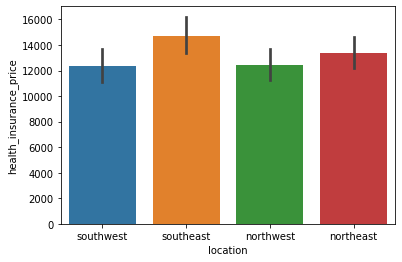

In [43]:
sns.barplot(x='location', y='health_insurance_price',data=newdf) 

<Axes: xlabel='health_insurance_price', ylabel='Density'>

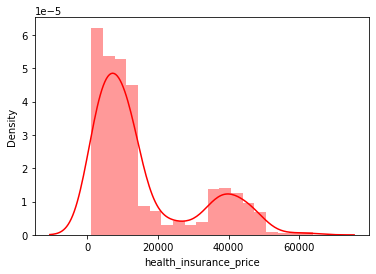

In [44]:
sns.distplot(newdf[(newdf.BMI>=30)]['health_insurance_price'],color='r')

<Axes: xlabel='health_insurance_price', ylabel='Density'>

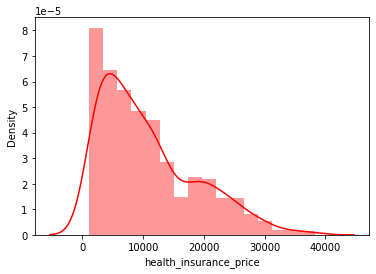

In [45]:
sns.distplot(newdf[(newdf.BMI<=30)]['health_insurance_price'],color='r')

## Encoding

In [46]:
categoricalfeature = [features for features in newdf.columns if newdf[features].dtypes=='object']
categoricalfeature

['gender', 'smoker_status', 'location']

In [47]:
from sklearn.preprocessing import OrdinalEncoder
orderen=OrdinalEncoder()
newdf[['gender', 'smoker_status', 'location']]=orderen.fit_transform(newdf[['gender', 'smoker_status', 'location']])
newdf

,age,gender,BMI,children,smoker_status,location,health_insurance_price
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [48]:
newdf['location'].value_counts()

2.0    364
3.0    325
1.0    325
0.0    324
Name: location, dtype: int64

## feature selection

In [49]:
newdf.corr()['health_insurance_price'].sort_values()

location                 -0.006208
gender                    0.057292
children                  0.067998
BMI                       0.198341
age                       0.299008
smoker_status             0.787251
health_insurance_price    1.000000
Name: health_insurance_price, dtype: float64

In [51]:
newdff = newdf.loc[:,['children','BMI','age','smoker_status','health_insurance_price']]

In [52]:
newdff

,children,BMI,age,smoker_status,health_insurance_price
0,0,27.900,19,1.0,16884.92400
1,1,33.770,18,0.0,1725.55230
2,3,33.000,28,0.0,4449.46200
3,0,22.705,33,0.0,21984.47061
4,0,28.880,32,0.0,3866.85520
...,...,...,...,...,...
1333,3,30.970,50,0.0,10600.54830
1334,0,31.920,18,0.0,2205.98080
1335,0,36.850,18,0.0,1629.83350
1336,0,25.800,21,0.0,2007.94500


## split dataset

In [53]:
x = newdff.drop(['health_insurance_price'],axis=1)
y = newdff.health_insurance_price

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [56]:
x_train=sc.fit_transform(x_train)

In [57]:
x_test=sc.transform(x_test)

## Apply Algorithm

In [58]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)

In [59]:
svm=SVR()
svm.fit(x_train,y_train)
y_pred2=svm.predict(x_test)

In [60]:
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)
y_pred3=gr.predict(x_test)

In [61]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred4=rf.predict(x_test)

In [62]:
from sklearn.tree import DecisionTreeRegressor
d=DecisionTreeRegressor()
d.fit(x_train,y_train)
y_pred5=d.predict(x_test)

In [63]:
df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'gr':y_pred3,'rf':y_pred4,'d':y_pred5,})

In [64]:
df1

,Actual,lr,svm,gr,rf,d
764,9095.06825,8550.909213,9539.353787,10281.551568,9537.712756,8615.30000
887,5272.17580,6969.715998,9472.370785,5815.008029,5017.927963,4399.73100
890,29330.98315,36794.136618,9678.595761,27881.255682,27919.280569,28950.46920
1293,9301.89355,9421.868242,9567.745537,9657.255577,9274.097233,9500.57305
259,33750.29180,26875.010958,9655.777981,34157.524977,34593.727692,33732.68670
...,...,...,...,...,...,...
109,47055.53210,39224.388648,9681.770102,46167.072852,47467.010194,46889.26120
575,12222.89830,11691.841974,9641.596921,12283.836875,12536.078118,11073.17600
535,6067.12675,7257.650635,9469.565579,6519.693883,5786.007004,5484.46730
543,63770.42801,40945.827042,9639.671044,48113.541603,46737.671149,47269.85400


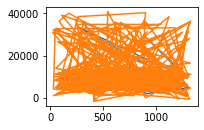

In [65]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'],label='lr')

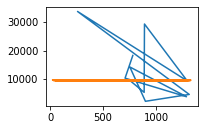

In [66]:
plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'],label='svm')

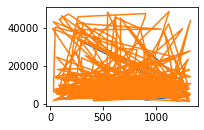

In [67]:
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'],label='gr')

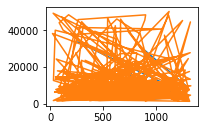

In [68]:
plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'],label='rf')

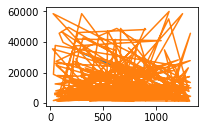

In [69]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['d'],label='d')

In [70]:
from sklearn import metrics

In [71]:
score1=print(round(metrics.r2_score(y_test,y_pred1),2))
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)
score5=metrics.r2_score(y_test,y_pred5)

print(score1,score2,score3,score4,score5)

0.78
None -0.06467991675329166 0.8777815965352825 0.8560878055897237 0.7423301147223973


In [72]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)
s5=metrics.mean_absolute_error(y_test,y_pred5)


print(s1,s2,s3,s4,s5)

4213.798594527236 8570.301892512447 2403.1238566997627 2510.888816050996 2992.009782477612


### After data analysis Gradientboosting Regressor gives a best predication.